In [2]:
import anndata
import numpy as np
import pandas as pd
import scanpy as sc

##### Integrate soupx cleaned gut samples and create an Anndata object. This also includes Fawkner-Corbett et al., Cell 2021 data. However, these samples were later removed due to differences in the initial preprocessing (soupx). 

In [24]:
MGT_metadata = pd.read_csv('/mnt/2021Jan/01_MGT_2021_Samples_p.txt', sep = '\t', index_col = 0)

In [25]:
path = '/mnt/2021Jan/'

In [26]:
import os
for file in os.listdir(path):
    if file.endswith("soupx_out"):
        print( file)

4918STDY7934977_soupx_out
Human_colon_16S8123921_soupx_out
Human_colon_16S8001871_soupx_out
4918STDY7273965_soupx_out
Human_colon_16S8159183_soupx_out
4918STDY7693761_soupx_out
Human_colon_16S8123911_soupx_out
Human_colon_16S8000487_soupx_out
Human_colon_16S8002574_soupx_out
FCA_gut9456313_soupx_out
Human_colon_16S8000479_soupx_out
Human_colon_16S8000491_soupx_out
Human_colon_16S8159186_soupx_out
WTDAtest7844013_soupx_out
Human_colon_16S7985390_soupx_out
4918STDY7718976_soupx_out
4918STDY7717783_soupx_out
4918STDY7844898_soupx_out
Human_colon_16S8001879_soupx_out
4918STDY7717789_soupx_out
Human_colon_16S8159193_soupx_out
Human_colon_16S8001863_soupx_out
Human_colon_16S8159190_soupx_out
4918STDY7273964_soupx_out
4918STDY7426905_soupx_out
Human_colon_16S8001875_soupx_out
4918STDY7389431_soupx_out
4918STDY7718977_soupx_out
FCA_gut8015060_soupx_out
4918STDY7714150_soupx_out
Human_colon_16S8002630_soupx_out
FCA_gut9456319_soupx_out
FCA_gut8015058_soupx_out
WTDAtest7844030_soupx_out
Human_co

In [32]:
MGT_metadata["Sample name"] = MGT_metadata["Sample name"].fillna("fetal")

In [35]:
adata = [sc.read_10x_mtx(path + filename + '_soupx_out', 
                             cache = True, make_unique = True) for filename in MGT_metadata.index]

In [36]:
MGT_metadata

,Sample name,Diagnosis,Age,sample name,Region unify,Region code,Fraction,Gender,Region,10X,V2.0,clean
Sanger sample ID,,,,,,,,,,,,
4918STDY7333456,T036,Pediatric healthy,4,T036-TIL-SC-EPCAMP,ILE,TIL,SC-EPCAMP,M,SmallInt,3',included,soupx
4918STDY7702680,T110POS,Pediatric healthy,4,T110-TIL-SC-EPCAMP,ILE,TIL,SC-EPCAMP,M,SmallInt,3',included,soupx
4918STDY7844899,T161,Pediatric healthy,4,T161-TIL-SC-EPCAMP,ILE,TIL,SC-EPCAMP,M,SmallInt,3',included,soupx
4918STDY7447825,T057,Pediatric healthy,6,T057-TIL-SC-EPCAMP,ILE,TIL,SC-EPCAMP,M,SmallInt,3',included,soupx
4918STDY7923744,T182,Pediatric healthy,9,T182-TIL-SC-EPCAMP,ILE,TIL,SC-EPCAMP,M,SmallInt,3',included,soupx
...,...,...,...,...,...,...,...,...,...,...,...,...
WTDAtest7770716,A30 (398B),Healthy adult,NaN,A30-SCL-6-SC-45P-1,CO,SCL,SC-45P,F,LargeInt,3',new,soupx
WTDAtest7770717,A30 (398B),Healthy adult,NaN,A30-SCL-6-SC-45N-1,CO,SCL,SC-45N,F,LargeInt,3',new,soupx
WTDAtest7770718,A30 (398B),Healthy adult,NaN,A30-SCL-6-SC-45P-2,CO,SCL,SC-45P,F,LargeInt,3',new,soupx


In [37]:
len(adata)

170

In [38]:
for i in range(len(adata)):
    adata[i].obs['sample'] = MGT_metadata.index[i]
    for col in MGT_metadata.columns:
        adata[i].obs[col] = MGT_metadata[col][i]
adata = adata[0].concatenate(adata[1:], batch_categories = MGT_metadata.index)

In [40]:
adata.obs

,sample,Sample name,Diagnosis,Age,sample name,Region unify,Region code,Fraction,Gender,Region,10X,V2.0,clean,batch
AAACCTGAGAACAACT-1-4918STDY7333456,4918STDY7333456,T036,Pediatric healthy,4,T036-TIL-SC-EPCAMP,ILE,TIL,SC-EPCAMP,M,SmallInt,3',included,soupx,4918STDY7333456
AAACCTGAGAAGAAGC-1-4918STDY7333456,4918STDY7333456,T036,Pediatric healthy,4,T036-TIL-SC-EPCAMP,ILE,TIL,SC-EPCAMP,M,SmallInt,3',included,soupx,4918STDY7333456
AAACCTGAGCGATATA-1-4918STDY7333456,4918STDY7333456,T036,Pediatric healthy,4,T036-TIL-SC-EPCAMP,ILE,TIL,SC-EPCAMP,M,SmallInt,3',included,soupx,4918STDY7333456
AAACCTGAGGAGTTTA-1-4918STDY7333456,4918STDY7333456,T036,Pediatric healthy,4,T036-TIL-SC-EPCAMP,ILE,TIL,SC-EPCAMP,M,SmallInt,3',included,soupx,4918STDY7333456
AAACCTGAGTATCTCG-1-4918STDY7333456,4918STDY7333456,T036,Pediatric healthy,4,T036-TIL-SC-EPCAMP,ILE,TIL,SC-EPCAMP,M,SmallInt,3',included,soupx,4918STDY7333456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAAGTAAAGACATACA_10-Simmons,Simmons,fetal,fetal,fetal,fetal,fetal,fetal,fetal,fetal,fetal,5',published,no_soupx,Simmons
TCAGTTTCAAACTAAG_10-Simmons,Simmons,fetal,fetal,fetal,fetal,fetal,fetal,fetal,fetal,fetal,5',published,no_soupx,Simmons
TCACGCTTCCAATGCA_10-Simmons,Simmons,fetal,fetal,fetal,fetal,fetal,fetal,fetal,fetal,fetal,5',published,no_soupx,Simmons
CAGCCAGAGCAACCAG_10-Simmons,Simmons,fetal,fetal,fetal,fetal,fetal,fetal,fetal,fetal,fetal,5',published,no_soupx,Simmons


In [15]:
adata.write('/mnt/2021Jan/01_MGT_megamatrix_01_extended.h5ad')

... storing 'sample' as categorical
... storing 'Sample name' as categorical
... storing 'Diagnosis' as categorical
... storing 'Age' as categorical
... storing 'sample name' as categorical
... storing 'Region unify' as categorical
... storing 'Region code' as categorical
... storing 'Fraction' as categorical
... storing 'Gender' as categorical
... storing 'Region' as categorical
... storing '10X' as categorical
... storing 'V2.0' as categorical
... storing 'clean' as categorical


In [3]:
adata = sc.read_h5ad('/mnt/2021Jan/01_MGT_megamatrix_01_extended.h5ad')

In [7]:
adata.obs.Diagnosis.value_counts()

Healthy adult              658357
fetal                      330734
Pediatric healthy           49205
Pediatric Crohn Disease     40439
Pediatric likely IBD        15110
Neonatal                     8895
Name: Diagnosis, dtype: int64

In [41]:
sc.pp.filter_cells(adata, min_genes=200)
#sc.pp.filter_genes(adata, min_cells=3)

In [42]:
adata

AnnData object with n_obs × n_vars = 961621 × 33538
    obs: 'sample', 'Sample name', 'Diagnosis', 'Age', 'sample name', 'Region unify', 'Region code', 'Fraction', 'Gender', 'Region', '10X', 'V2.0', 'clean', 'batch', 'n_genes'
    var: 'gene_ids'

In [43]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

... storing 'sample' as categorical
... storing 'Sample name' as categorical
... storing 'Diagnosis' as categorical
... storing 'Age' as categorical
... storing 'sample name' as categorical
... storing 'Region unify' as categorical
... storing 'Region code' as categorical
... storing 'Fraction' as categorical
... storing 'Gender' as categorical
... storing 'Region' as categorical
... storing '10X' as categorical
... storing 'V2.0' as categorical
... storing 'clean' as categorical


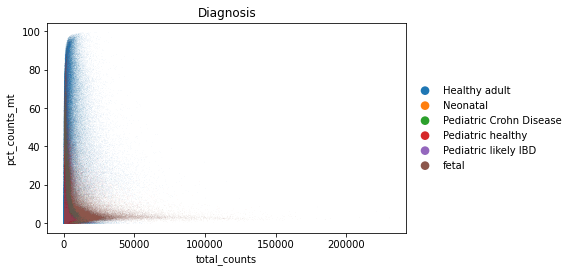

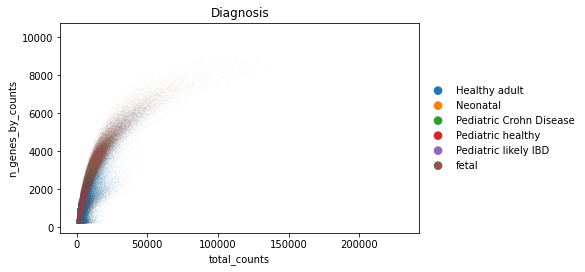

In [44]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color="Diagnosis")
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color="Diagnosis")

In [45]:
adata1 = adata[adata.obs.n_genes_by_counts < 8000, :]
adata1 = adata1[adata1.obs.pct_counts_mt < 50, :]

In [48]:
#get rid of empty-ish droplets
adata1 = adata1[adata1.obs["n_genes"] > 500]

In [47]:
adata.obs.clean.value_counts()

soupx       885029
no_soupx     76592
Name: clean, dtype: int64

In [49]:
adata1.obs.clean.value_counts()

soupx       557555
no_soupx     76554
Name: clean, dtype: int64

Transfer annotation from v01 and remove doublets

In [51]:
MGT_V01 = sc.read("/mnt/PROJECTS/CellrangerV3_GRCh38-3.0.0_analysis/Integrated_counts_log06.h5ad")
#assign V1 annotations to cells
new = MGT_V01[MGT_V01.obs_names.isin(adata.obs_names)]
new2 = adata[adata.obs_names.isin(new.obs_names)]

df_v01 = new.obs
df_v02 = new2.obs

df_v01 = df_v01.reindex(df_v02.index)

new2.obs["annotation_02"] = df_v01["annotation_02"]

df3 = pd.merge( adata.obs,new2.obs, left_index=True, 
               right_index=True,on=['sample', 'Sample name', 'Diagnosis', 'Age', 'sample name',
       'Region code', 'Fraction', 'Gender', 'Region', '10X', 'V2.0', 'batch',
       'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt',
       'pct_counts_mt'], how='outer', sort=False)

adata.obs = df3.reindex(adata.obs.index)
adata.obs["annotation_02"] = adata.obs["annotation_02"].cat.add_categories('Unknown')
adata.obs["annotation_02"].fillna('Unknown', inplace =True) 

Trying to set attribute `.obs` of view, copying.


In [52]:
adata.obs.tail()

,sample,Sample name,Diagnosis,Age,sample name,Region unify_x,Region code,Fraction,Gender,Region,...,clean_x,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,Region unify_y,clean_y,annotation_02
GAAGTAAAGACATACA_10-Simmons,Simmons,fetal,fetal,fetal,fetal,fetal,fetal,fetal,fetal,fetal,...,no_soupx,Simmons,2298,2298,7302.0,246.0,3.368940,NaN,NaN,Unknown
TCAGTTTCAAACTAAG_10-Simmons,Simmons,fetal,fetal,fetal,fetal,fetal,fetal,fetal,fetal,fetal,...,no_soupx,Simmons,3027,3027,10610.0,456.0,4.297832,NaN,NaN,Unknown
TCACGCTTCCAATGCA_10-Simmons,Simmons,fetal,fetal,fetal,fetal,fetal,fetal,fetal,fetal,fetal,...,no_soupx,Simmons,1116,1116,2363.0,66.0,2.793060,NaN,NaN,Unknown
CAGCCAGAGCAACCAG_10-Simmons,Simmons,fetal,fetal,fetal,fetal,fetal,fetal,fetal,fetal,fetal,...,no_soupx,Simmons,1030,1030,2464.0,130.0,5.275974,NaN,NaN,Unknown
ATTTCACTCTAAACGC_10-Simmons,Simmons,fetal,fetal,fetal,fetal,fetal,fetal,fetal,fetal,fetal,...,no_soupx,Simmons,2925,2925,8187.0,151.0,1.844388,NaN,NaN,Unknown


In [53]:
df = pd.read_csv("/mnt/2021Jan/scrublet_results/all_scores_together02.csv", index_col="barcode")
df = df.drop(["Unnamed: 0","Unnamed: 0.1","Unnamed: 0.1.1"], axis=1)
df.index = df.index.astype(str)
df = df[~df.index.duplicated(keep='first')]

df1 = adata.obs
df = df[df.index.isin(df1.index)] 

In [55]:
adata.obs = pd.concat([adata.obs, df], axis=1).reindex(adata.obs.index)

In [57]:
adata.obs.predicted_doublets = adata.obs.predicted_doublets.fillna(False)

In [58]:
#Remove cells predicted to be doublets by scrublet (treshold 0.25)
adata = adata[adata.obs["predicted_doublets"]==False]

In [132]:
adata.obs["annotation_v02"] = "Unknown"

Trying to set attribute `.obs` of view, copying.


In [133]:
#Import Oxford metadata
import glob, os    
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('/mnt/2021Jan/Oxford_data/', "metadata*.csv"))))

In [134]:
df.index = df["Unnamed: 0"].astype(str)+"-Simmons"

In [135]:
df["PCW"] = df["PCW"].astype(str) + "Wks"


In [136]:
df.columns = ['barcode', 'nCount_RNA', 'nFeature_RNA', 'Region', 'Region code',
       'Age', 'Sample name', 'sample name', 'sample', 'annotation_v02']

In [165]:
df

,barcode,nCount_RNA,nFeature_RNA,Region,Region code,Age,Sample name,sample name,sample,annotation_v02
Unnamed: 0,,,,,,,,,,
CAAGAGGCATCCTTCG_4-Simmons,CAAGAGGCATCCTTCG_4,4941,2030,Colon,Proximal colon,13Wks,"rsa(13,15,16,18,21,22,X)x2",3_2,ABN2,BMPER+ Pericytes
TAAGTCGCACCACTGG_4-Simmons,TAAGTCGCACCACTGG_4,5871,2487,Colon,Proximal colon,20Wks,"rsa(13,15,16,18,21,22)x2,(X,Y)x1",3_2,ACB2,Pericyte Progenitors
CCTCAACCACAACGCC_4-Simmons,CCTCAACCACAACGCC_4,5883,2170,TI,TI,20Wks,"rsa(13,15,16,18,21,22)x2,(X,Y)x1",3_2,ACB1,Contractile Pericytes
TCCTTTCGTTTAGAGA_4-Simmons,TCCTTTCGTTTAGAGA_4,5871,2280,TI,TI,20Wks,"rsa(13,15,16,18,21,22)x2,(X,Y)x1",3_2,ACB1,Contractile Pericytes
ACTCTCGTCTCTATGT_4-Simmons,ACTCTCGTCTCTATGT_4,7618,2740,TI,TI,9Wks,"rsa(13,15,16,18,21,22)x2,(X,Y)x1",3_2,AAC1,Pericyte Progenitors
...,...,...,...,...,...,...,...,...,...,...
TAGTGCACAAAGGGCT_9-Simmons,TAGTGCACAAAGGGCT_9,5363,2065,TI,TI,22Wks,"rsa(13,15,16,18,21,22)x2,(X,Y)x1",2_2,AAP1,Myofibroblasts
GTTACCCGTCATACCA_9-Simmons,GTTACCCGTCATACCA_9,3833,1733,Colon,Distal colon,22Wks,"rsa(13,15,16,18,21,22)x2,(X,Y)x1",2_2,AAP3,Myofibroblast Progenitors
ATTCGTTTCTCAAAGC_9-Simmons,ATTCGTTTCTCAAAGC_9,2584,1333,Colon,Distal colon,22Wks,"rsa(13,15,16,18,21,22)x2,(X,Y)x1",2_2,AAP3,Mesothelium SOX6+


In [161]:
df_gut = pd.read_csv("//mnt/2021Jan/04_MGT_04_annotation_02.csv", index_col="Unnamed: 0")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (4,5,9,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [163]:
df_gut["annotation_v2.0"]

array(['DZ GC cell', 'Cycling B cell2', 'gdT', 'Memory B cell', 'Treg',
       'Naive B', 'Cycling plasma cell', 'Cycling B cell', 'Tfh',
       'Enterocyte2', 'Activated CD4 T', 'pre GC?', 'CD8 Tmem', 'GC cell',
       'SELL+ CD8 T', 'FDC', 'SELL+ CD4 T', 'IgM plasma cell',
       'NK T cell', 'LZ GC cell', 'NK cell', 'HHIP+ myofibroblast',
       'IgA plasma cell', 'Stem', 'IgG plasma cell', 'Activated CD8 T',
       'Enterocyte3', 'Enterocyte4', 'Stromal 1',
       'MMP9+ Inflammatory macrophage', 'cDC2', 'Enterocyte',
       'Arterial EC', 'ILC3', 'Lymphatic EC', 'IgA plasma cell2', 'TA',
       'CXCL13+ Stromal 4', 'STAT1+ Naive B', 'Stromal 4(T reticular)',
       'Capilarry', 'Mast cell', 'Goblet', 'enteroendocrine', 'Tuft cell',
       'FCRL4+ B cell', 'COL6A5+ Stromal 1', 'M cell', 'Pericyte', 'cDC1',
       'Venous EC', 'Stromal 2', 'LYVE1+ Macrophage', 'BEST4 enterocyte',
       'Monocyte', 'pericyte', 'Contractile pericyte', 'Stromal 3',
       'Glial', 'EC', 'MAFB+ cDC2', 

In [143]:
ON = {O:N for O,N in zip(df.index,df["annotation_v02"])}
adata.obs["annotation_v02"] = [ON[O] if O in ON else N for O,N in zip(adata.obs_names,
                                                                    adata.obs["annotation_v02"])]

ON = {O:N for O,N in zip(df.index,df["Sample name"])}
adata.obs["Sample name"] = [ON[O] if O in ON else N for O,N in zip(adata.obs_names,
                                                                    adata.obs["Sample name"])]

ON = {O:N for O,N in zip(df.index,df["Age"])}
adata.obs["Age"] = [ON[O] if O in ON else N for O,N in zip(adata.obs_names,
                                                                    adata.obs["Age"])]

ON = {O:N for O,N in zip(df.index,df["sample"])}
adata.obs["sample"] = [ON[O] if O in ON else N for O,N in zip(adata.obs_names,
                                                                    adata.obs["sample"])]
ON = {O:N for O,N in zip(df.index,df["Region code"])}
adata.obs["Region code"] = [ON[O] if O in ON else N for O,N in zip(adata.obs_names,
                                                                    adata.obs["Region code"])]
ON = {O:N for O,N in zip(df.index,df["Region code"])}
adata.obs["Region"] = [ON[O] if O in ON else N for O,N in zip(adata.obs_names,
                                                                    adata.obs["Region"])]

ON = {O:N for O,N in zip(df.index,df["annotation_v02"])}
adata.obs["annotation_02"] = [ON[O] if O in ON else N for O,N in zip(adata.obs_names,
                                                                    adata.obs["annotation_02"])]

ON = {O:N for O,N in zip(df_gut.index,df_gut["annotation_v2.0"])}
adata.obs["annotation_v02"] = [ON[O] if O in ON else N for O,N in zip(adata.obs_names,
                                                                    adata.obs["annotation_v02"])]

In [ ]:
ON = {O:N for O,N in zip(df_gut.index,df_gut["annotation_v2.0"])}
adata2.obs["annotation_v02"] = [ON[O] if O in ON else N for O,N in zip(adata2.obs_names,
                                                                    adata2.obs["annotation_v02"])]

In [147]:
adata2 = adata[~adata.obs["annotation_v02"].isin([
       'myo_doublet',  'empty', 
       'B_doublet', 'T_doublet',  'epi_doublet',
       'epi_doublet3',  'epi_doublet2',
       'mes_doublet', 'BEST1 odd',  'empty3', 'empty2',
       'doublet',
        'stressed', 'empty1',
        '?_doublet',  'mLTo_doublet',
       'ery_doublet',"Unknown"])]

In [170]:
unknown = adata.obs[adata.obs["annotation_v02"].isin(["Unknown"])]
unknown['Region code'].value_counts()

REC      63867
CAE      51094
TIL      28518
TCL      26732
JEJ      20969
MLN      20885
SCL      18689
ACL      16170
fetal    13190
FTIL     12290
FPIL     11996
APD      10561
DCL       7740
ILE       7544
DUO       7400
ILE1      6935
FLI       6367
FMIL      5355
ILE2      3780
STO        149
Name: Region code, dtype: int64

In [149]:
adata2

View of AnnData object with n_obs × n_vars = 519906 × 33538
    obs: 'sample', 'Sample name', 'Diagnosis', 'Age', 'sample name', 'Region unify_x', 'Region code', 'Fraction', 'Gender', 'Region', '10X', 'V2.0', 'clean_x', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Region unify_y', 'clean_y', 'annotation_02', 'doublet_scores', 'predicted_doublets', 'annotation_v02'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Diagnosis_colors'

In [150]:
adata2.write('/mnt/2021Jan/06_MGT_rawcounts_annotation.h5ad')

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'sample' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Sample name' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Diagnosis' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Age' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'sample name' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Region code' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Fraction' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Gender' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Region' as categorical
Trying to set attribute `.ob

In [18]:
#adata1.write('/mnt/2021Jan/01_MGT_megamatrix_rawcounts_annotation.h5ad')

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:1208: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'sample' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Sample name' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Diagnosis' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Age' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'sample name' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Region code' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'Region' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'batch' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'annotation_v2.0' as categorical


Proceed with normalisation 

In [151]:
sc.pp.filter_genes(adata2, min_cells=3)

In [152]:
adata2

AnnData object with n_obs × n_vars = 519906 × 30535
    obs: 'sample', 'Sample name', 'Diagnosis', 'Age', 'sample name', 'Region unify_x', 'Region code', 'Fraction', 'Gender', 'Region', '10X', 'V2.0', 'clean_x', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Region unify_y', 'clean_y', 'annotation_02', 'doublet_scores', 'predicted_doublets', 'annotation_v02'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    uns: 'Diagnosis_colors'

In [153]:
sc.pp.normalize_total(adata2, target_sum=1e4)
sc.pp.log1p(adata2)
adata2.raw = adata2

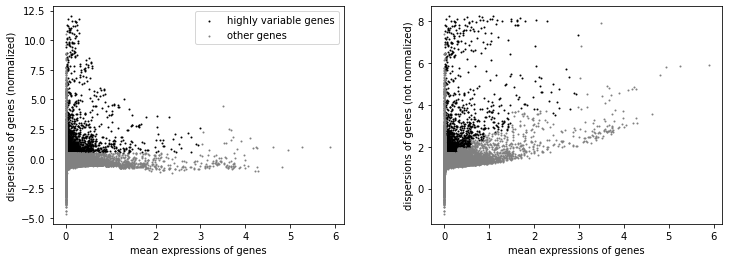

In [154]:
sc.pp.highly_variable_genes(adata2, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata2)
adata2 = adata2[:, adata2.var['highly_variable']]
sc.pp.regress_out(adata2, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata2, max_value=10)
sc.tl.pca(adata2, svd_solver='arpack')

In [155]:
import bbknn
bbknn.bbknn(adata2, batch_key='batch', neighbors_within_batch=3, 
            metric='euclidean', n_pcs=30)
sc.tl.umap(adata2)

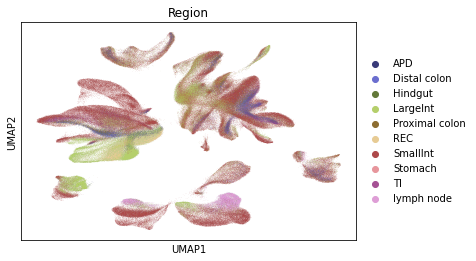

In [159]:
sc.pl.umap(adata2, color=["Region"], palette="tab20b")

In [164]:
df.obs["Cluster"].value_counts()

SC           203832
SC-EPCAMP    127553
fetal         63402
SC-45P        55992
SC-45N        38034
SC-EPCAMN     31093
Name: Fraction, dtype: int64

In [ ]:
adata1.write('/mnt/2021Jan/04_MGT_04_annotation_soupx.h5ad')

In [230]:
adata.write('/mnt/2021Jan/01_MGT_megamatrix_01_soupx.h5ad')

In [160]:
adata2.write('/mnt/2021Jan/06_MGT_annotation_integrated.h5ad')